In [3]:
import os
import pandas as pd
from fbprophet import Prophet

In [4]:
os.setwd()

'/Users/jefching/Documents/GitHub/Springboard/capstone/1'

In [5]:
passengers = pd.read_csv("data/AirPassengers.csv")

In [10]:
passengers.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [11]:
df = pd.DataFrame()

In [13]:
df['ds'] = pd.to_datetime(passengers['Month'])
df['y'] = passengers['#Passengers']

In [14]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [20]:
prophet = Prophet()

In [21]:
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [23]:
#make a monthly forecast for 'all' 12 months times 6 (years), freq = M
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')

In [24]:
#pass in periods to forecast
forecast = prophet.predict(future)

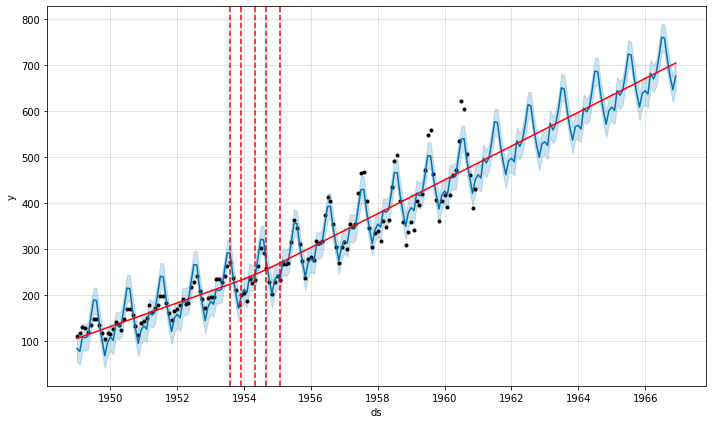

In [29]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet.plot(forecast)
# add changepoint detection lines to plot based on plots 'get' current axis (gca)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)

#the original data are the black dots, the forecasted model is the blue, light blue is the CI

In [35]:
prophet = Prophet()

In [36]:
prophet.add_country_holidays(country_name='US')